<a href="https://colab.research.google.com/github/KhandkerHaque/titanic/blob/main/Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis in Python.

## Let us understand how to explore the data in python.



![alt text](https://moriohcdn.b-cdn.net/ff3cc511fb.png)


Image Credits: Morioh

## Introduction

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today ?**



Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from [here](https://www.kaggle.com/CooperUnion/cardataset). To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

sns.set(style="whitegrid", font_scale=1.75)

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('breast-cancer raw data.csv')

# Display the first few rows
print(df.head())

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [13]:
display(df.describe())

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [7]:
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

# Show rows that contain at least one missing value
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
columns_with_missing = df.columns[df.isnull().any()]
print("Columns with missing values:", columns_with_missing.tolist())

Total missing values in the dataset: 0
Empty DataFrame
Columns: [Class, age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat]
Index: []
Columns with missing values: []


In [9]:
num_instances = df.shape[0]
print("Total number of instances (rows):", num_instances)
num_attributes = df.shape[1]
print("Total number of attributes (columns):", num_attributes)
num_classes = df['Class'].nunique()  # Use column name 'Class'
print("Number of classes:", num_classes)
print("Class names:", df['Class'].unique()) # Use column name 'Class'

Total number of instances (rows): 286
Total number of attributes (columns): 10
Number of classes: 2
Class names: ['no-recurrence-events' 'recurrence-events']


In [14]:
display(df['Class'].value_counts())

,count
Class,
no-recurrence-events,201
recurrence-events,85


Based on the dataset information and previous analysis, the target variable is **'Class'**. This column indicates whether a patient had "no-recurrence-events" or "recurrence-events".

No missing data

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [11]:
# Based on the breast_cancer.variables output:
# 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat' are Categorical/Binary (Nominal)
# 'deg-malig' is Integer (Linear)

# Count the number of nominal and linear features
nominal_count = 8
linear_count = 1

print(f"Number of nominal (categorical/binary) features: {nominal_count}")
print(f"Number of linear (integer) features: {linear_count}")

Number of nominal (categorical/binary) features: 8
Number of linear (integer) features: 1


In [12]:
display(df.describe())

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


from matplotlib import pyplot as plt
_df_0['deg-malig'].plot(kind='hist', bins=20, title='deg-malig')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['deg-malig'].plot(kind='line', figsize=(8, 4), title='deg-malig')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
print(breast_cancer.variables)

          name     role         type demographic  \
0        Class   Target       Binary        None   
1          age  Feature  Categorical         Age   
2    menopause  Feature  Categorical        None   
3   tumor-size  Feature  Categorical        None   
4    inv-nodes  Feature  Categorical        None   
5    node-caps  Feature       Binary        None   
6    deg-malig  Feature      Integer        None   
7       breast  Feature       Binary        None   
8  breast-quad  Feature  Categorical        None   
9     irradiat  Feature       Binary        None   

                                         description  units missing_values  
0            no-recurrence-events, recurrence-events   None             no  
1  10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-7...  years             no  
2                                lt40, ge40, premeno   None             no  
3  0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 3...   None             no  
4   0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-

In [16]:
print(df.isnull().sum())

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [17]:
# Identify categorical columns (excluding the target variable 'Class' if you don't want to encode it)
categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
print("DataFrame after one-hot encoding:")
display(df_encoded.head())

# Display the shape of the new DataFrame to show the added columns
print("\nShape of the encoded DataFrame:", df_encoded.shape)

DataFrame after one-hot encoding:


,Class,deg-malig,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_24-26,node-caps_no,node-caps_yes,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,no-recurrence-events,3,True,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,no-recurrence-events,2,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
2,no-recurrence-events,2,False,True,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,no-recurrence-events,2,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,no-recurrence-events,2,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False



Shape of the encoded DataFrame: (286, 34)


In [19]:
# Convert the target variable 'Class' to numerical
df_encoded['Class_numeric'] = df_encoded['Class'].apply(lambda x: 1 if x == 'recurrence-events' else 0)

# Drop the original 'Class' column as it's not needed for correlation calculation
df_numeric = df_encoded.drop('Class', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Get correlations with the target variable 'Class_numeric'
target_correlation = correlation_matrix['Class_numeric'].sort_values(ascending=False)

# Drop the correlation with itself
target_correlation = target_correlation.drop('Class_numeric', errors='ignore')

# Get the top 3 attributes with the highest absolute correlation
top_3_attributes = target_correlation.abs().nlargest(3)

print("Top 3 attributes based on correlation with 'Class':")
print(top_3_attributes)

Top 3 attributes based on correlation with 'Class':
deg-malig        0.299400
node-caps_yes    0.276792
node-caps_no     0.274964
Name: Class_numeric, dtype: float64


Based on the correlation analysis performed in the previous step, the top three attributes with the strongest relationship (highest absolute correlation) with the target variable 'Class' are:

1.  **deg-malig**
2.  **node-caps_yes**
3.  **node-caps_no** (which is complementary to node-caps_yes)

The diagrams in the following cell visualize the distribution of these attributes with respect to the target variable 'Class'.

2 a

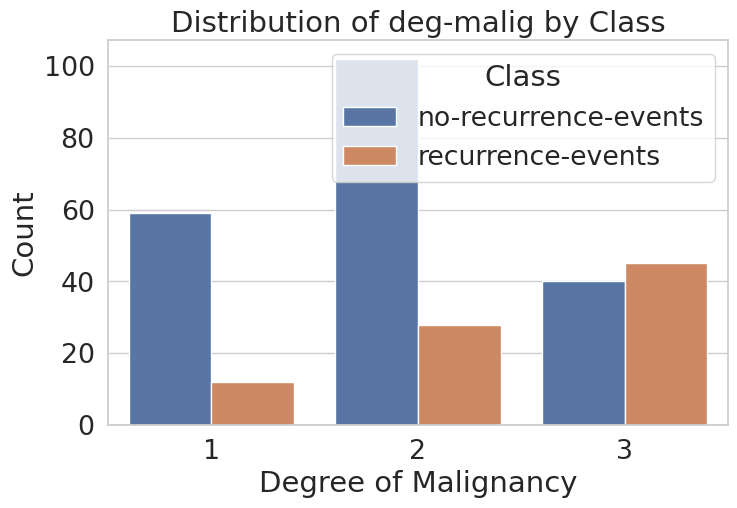

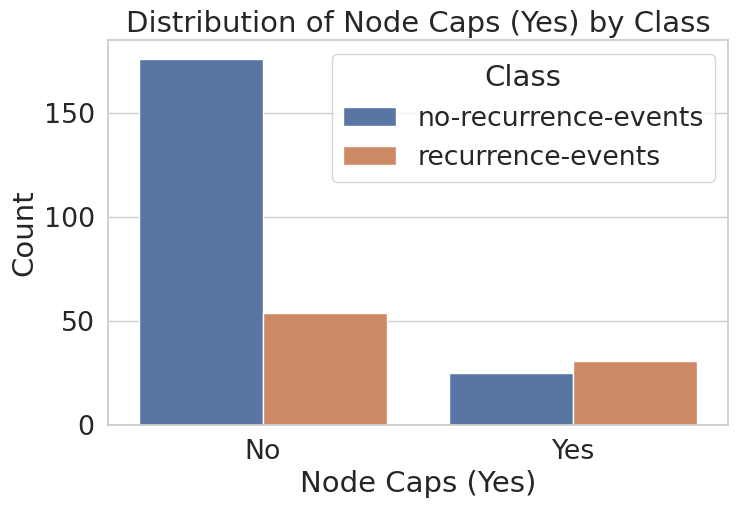

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'deg-malig' with respect to 'Class'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded, x='deg-malig', hue='Class')
plt.title('Distribution of deg-malig by Class')
plt.xlabel('Degree of Malignancy')
plt.ylabel('Count')
plt.show()

# Plot distribution of 'node-caps' with respect to 'Class'
# We can use either 'node-caps_yes' or 'node-caps_no' since they are complementary
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded, x='node-caps_yes', hue='Class')
plt.title('Distribution of Node Caps (Yes) by Class')
plt.xlabel('Node Caps (Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) # Label the x-axis for clarity
plt.show()

Degree of Malignancy = 1 (Low malignancy):

Majority of cases are no-recurrence-events (~60).

Very few recurrence-events (~10–12).

Suggests low malignancy tumors are less likely to recur.

Degree of Malignancy = 2 (Intermediate malignancy):

Most cases are still no-recurrence-events (~100).

Some recurrence-events (~25–30).

Indicates higher recurrence risk compared to degree 1, but still dominated by non-recurrences.

Degree of Malignancy = 3 (High malignancy):

Counts of recurrence-events (~45) and no-recurrence-events (~40) are roughly balanced.

Shows that at higher malignancy, the probability of recurrence is substantially higher and nearly equal to non-recurrence.

Overall Insight:

Trend: As malignancy increases from 1 → 3, recurrence events become more frequent.

Low degree (1): Very low recurrence risk.

Intermediate degree (2): Moderate recurrence risk, but still more non-recurrence cases.

High degree (3): Nearly equal risk of recurrence vs. non-recurrence.

📌 Conclusion: Degree of malignancy strongly correlates with recurrence risk — higher malignancy leads to a higher likelihood of cancer recurrence.

2 b

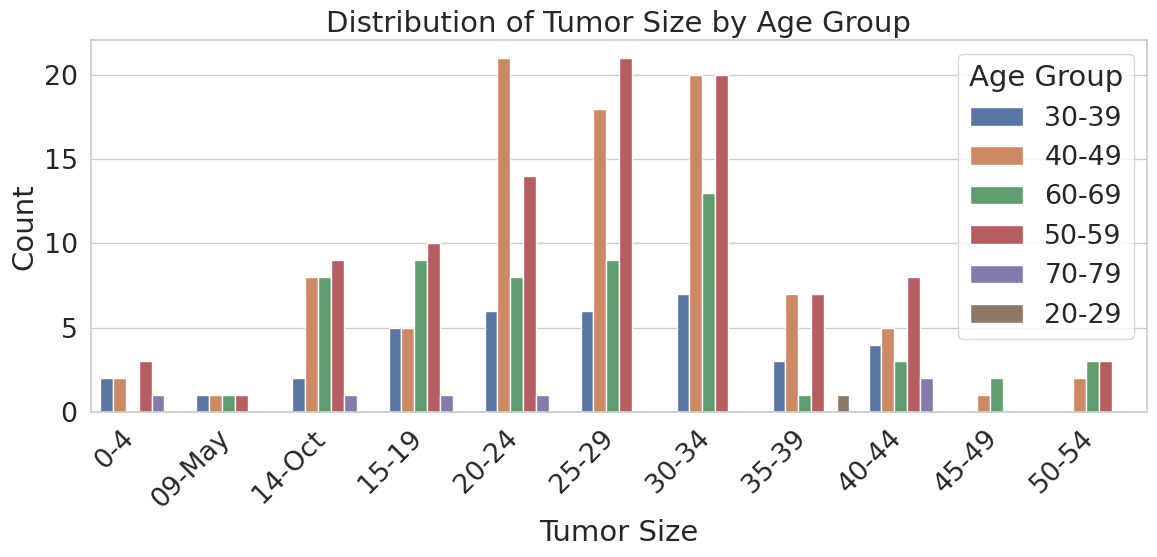

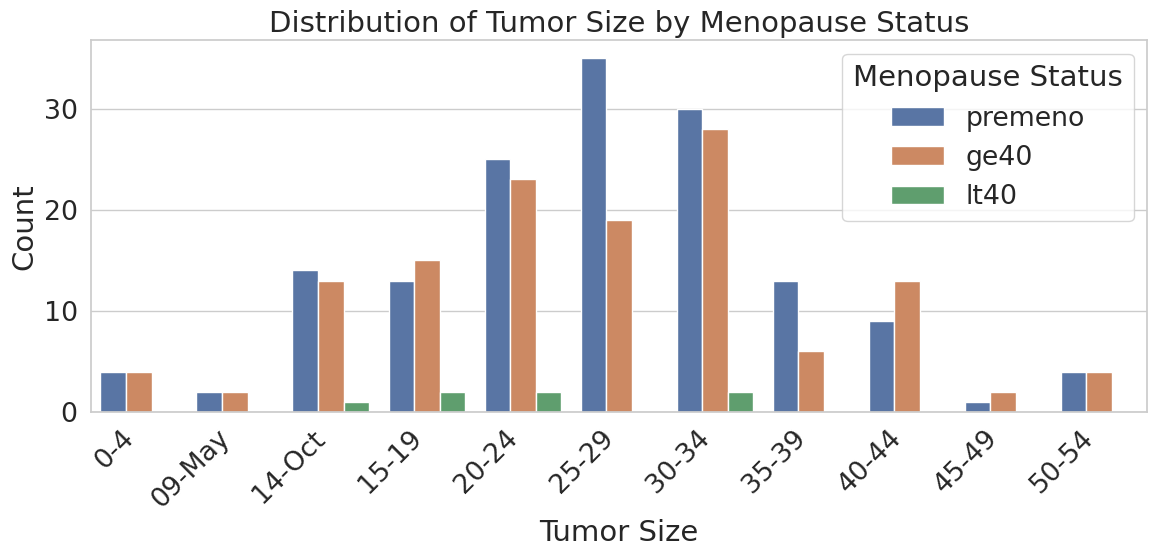

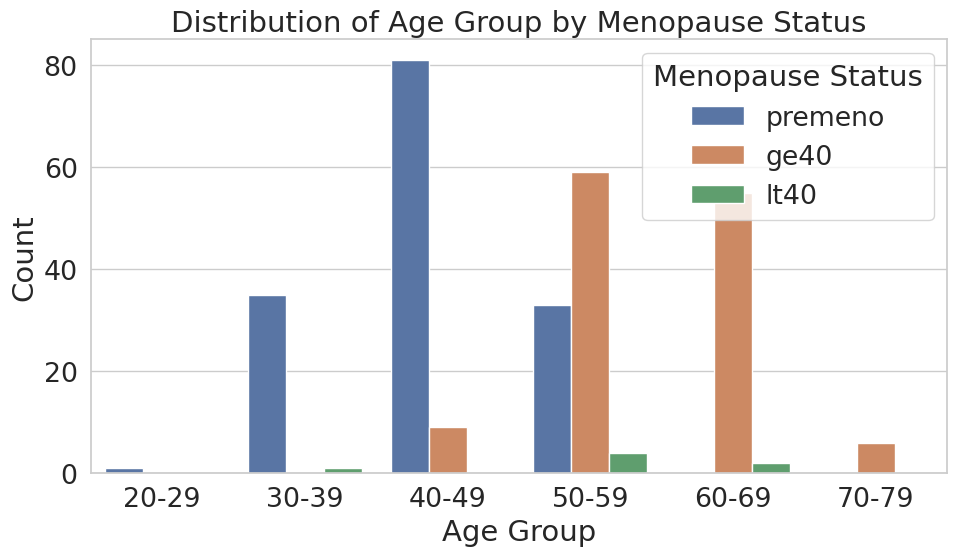

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between 'tumor-size' and 'age'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tumor-size', hue='age', order=sorted(df['tumor-size'].unique()))
plt.title('Distribution of Tumor Size by Age Group')
plt.xlabel('Tumor Size')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Visualize the relationship between 'tumor-size' and 'menopause'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tumor-size', hue='menopause', order=sorted(df['tumor-size'].unique()))
plt.title('Distribution of Tumor Size by Menopause Status')
plt.xlabel('Tumor Size')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Menopause Status')
plt.tight_layout()
plt.show()

# Visualize the relationship between 'age' and 'menopause'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age', hue='menopause', order=sorted(df['age'].unique()))
plt.title('Distribution of Age Group by Menopause Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Menopause Status')
plt.tight_layout()
plt.show()

Image 1:
Tumors are most commonly detected in the 40–59 age range, especially with sizes between 20–34 mm.

Younger (<30) and older (>70) patients have relatively fewer cases.

This suggests that middle age is a critical risk window for tumor development or detection, and tumor size tends to cluster in medium ranges rather than very small or very large sizes.

Image 2:
Premenopausal women show the highest frequency of medium-sized tumors (20–34 mm), indicating earlier tumor growth patterns before menopause.

Women aged ≥40 also display high tumor counts in similar ranges, though generally fewer than premenopausal women.

Women <40 have very few cases overall, suggesting lower incidence or smaller sample size in this category.

Across all groups, tumors tend to cluster in medium size categories rather than at very small or very large extremes.

Image 3:

Tumor distribution is strongly clustered in the 20–34 mm range, with premenopausal women showing the highest frequency, followed by women ≥40, while women <40 have the fewest cases.


The distribution of tumor size by menopause status revealed that most tumors clustered within the 20–34 mm range across all groups. Premenopausal women exhibited the highest frequency, with peaks at 25–29 mm (approximately 35 cases) and 30–34 mm (around 30 cases). Women aged ≥40 also showed substantial tumor counts, particularly at 20–24 mm (about 23 cases) and 30–34 mm (about 28 cases), although these were slightly lower than those observed in premenopausal women. In contrast, women aged <40 demonstrated very few cases overall, with minimal representation across all tumor size categories. Tumors larger than 40 mm were uncommon across all menopause groups. Collectively, these findings suggest that medium-sized tumors (20–34 mm) are most prevalent, particularly among premenopausal and older women, while very small and very large tumors occur infrequently.

2 c


In [23]:
def range_to_midpoint(range_str):
    """Converts a string range (e.g., '20-24') to its numerical midpoint, handling errors."""
    if pd.isna(range_str):
        return np.nan
    # Handle the specific case '05-Mar' as '3-5' based on dataset description
    if range_str == '05-Mar':
        range_str = '3-5'
    try:
        if '-' in range_str:
            start, end = map(int, range_str.split('-'))
            return (start + end) / 2
        else:
            # Attempt to convert single values directly, though expecting ranges
            return int(range_str)
    except ValueError:
        # Return NaN for values that cannot be converted
        print(f"Warning: Could not convert '{range_str}' to numerical.")
        return np.nan


# Apply the conversion function to 'tumor-size' and 'inv-nodes'
df['tumor-size_numeric'] = df['tumor-size'].apply(range_to_midpoint)
df['inv-nodes_numeric'] = df['inv-nodes'].apply(range_to_midpoint)

# Display the first few rows with the new numerical columns
print("DataFrame with numerical 'tumor-size' and 'inv-nodes':")
display(df[['tumor-size', 'tumor-size_numeric', 'inv-nodes', 'inv-nodes_numeric']].head())

# Display descriptive statistics for the new columns
print("\nDescriptive statistics for new numerical columns:")
display(df[['tumor-size_numeric', 'inv-nodes_numeric']].describe())

# Inspect unique values in the original columns to find problematic entries
print("\nUnique values in 'tumor-size':")
print(df['tumor-size'].unique())

print("\nUnique values in 'inv-nodes':")
print(df['inv-nodes'].unique())

DataFrame with numerical 'tumor-size' and 'inv-nodes':


,tumor-size,tumor-size_numeric,inv-nodes,inv-nodes_numeric
0,30-34,32.0,0-2,1.0
1,20-24,22.0,0-2,1.0
2,20-24,22.0,0-2,1.0
3,15-19,17.0,0-2,1.0
4,0-4,2.0,0-2,1.0



Descriptive statistics for new numerical columns:


,tumor-size_numeric,inv-nodes_numeric
count,254.000000,256.000000
mean,28.299213,1.867188
std,9.611271,2.840522
min,2.000000,1.000000
25%,22.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,1.000000
max,52.000000,25.000000



Unique values in 'tumor-size':
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '09-May' '45-49']

Unique values in 'inv-nodes':
['0-2' '08-Jun' '11-Sep' '05-Mar' '15-17' '14-Dec' '24-26']


In [24]:
data = {
    'tumor-size': ['0-4', '5-9', '20-24', '25-29', '50-54'],
    'inv-nodes': ['0-2', '3-5', '6-8', '9-11', '12-14']
}
df = pd.DataFrame(data)

# Function to convert interval string into midpoint value
def interval_to_midpoint(value):
    try:
        low, high = map(int, value.split('-'))
        return (low + high) / 2
    except:
        return None  # handle missing or special cases if any

In [25]:
df['tumor_size_num'] = df['tumor-size'].apply(interval_to_midpoint)
df['inv_nodes_num'] = df['inv-nodes'].apply(interval_to_midpoint)

In [26]:
print (df)

  tumor-size inv-nodes  tumor_size_num  inv_nodes_num
0        0-4       0-2             2.0            1.0
1        5-9       3-5             7.0            4.0
2      20-24       6-8            22.0            7.0
3      25-29      9-11            27.0           10.0
4      50-54     12-14            52.0           13.0


Converting ordinal categorical variables like tumor-size and inv-nodes into their numerical midpoints preserves their inherent order, improves model efficiency, and helps classifiers detect clinically meaningful trends.

2 d

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for np.nan

# Reload the complete dataset to ensure all columns are available
df = pd.read_csv('breast-cancer raw data.csv')


# Function to map interval to midpoint, including error handling and special cases
def interval_to_midpoint(val):
    """Converts a string range (e.g., '20-24') to its numerical midpoint, handling errors."""
    if pd.isna(val):
        return np.nan
    # Handle the specific case '05-Mar' as '3-5' based on dataset description
    if val == '05-Mar':
        val = '3-5'
    try:
        if '-' in val:
            start, end = map(int, val.split('-'))
            return (start + end) / 2
        else:
             # Attempt to convert single values directly, though expecting ranges
            return int(val)
    except ValueError:
        # Return NaN for values that cannot be converted
        # print(f"Warning: Could not convert '{val}' to numerical.") # Optional: keep warning
        return np.nan


# Convert ordinal categorical variables
df['tumor-size'] = df['tumor-size'].apply(interval_to_midpoint)
df['inv-nodes'] = df['inv-nodes'].apply(interval_to_midpoint)

# Encode nominal categorical variables
# Identify nominal columns excluding the target
nominal_cols = ['age', 'menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


# Separate the target variable before scaling
target = df_encoded['Class']
# Drop the original 'Class' column and the target variable from features
features_df = df_encoded.drop(['Class'], axis=1)

# Standardize the numerical features
# Identify numerical columns (now including the converted 'tumor-size' and 'inv-nodes')
numerical_cols = ['tumor-size', 'inv-nodes', 'deg-malig'] + [col for col in features_df.columns if col.startswith(('age_', 'menopause_', 'node-caps_', 'breast_', 'breast-quad_', 'irradiat_'))] # Assuming encoded columns start with prefixes

# Ensure only numerical columns are selected for scaling
features_for_scaling = features_df[numerical_cols]


# Handle potential NaNs in numerical columns before scaling (e.g., from interval conversion failures)
# For simplicity here, I will drop rows with NaNs. Imputation could also be considered.
features_for_scaling = features_for_scaling.dropna()
# Align target with features after dropping rows
target_aligned = target.loc[features_for_scaling.index]


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features_for_scaling), columns=features_for_scaling.columns)


# Report descriptive statistics of the scaled data
stats = df_scaled.agg(['min', 'max', 'mean']).T
print(stats)

                            min       max          mean
tumor-size            -2.666309  2.492071 -7.105427e-17
inv-nodes             -0.324217  7.670179 -6.315935e-17
deg-malig             -1.446198  1.299747  9.473903e-17
age_30-39             -0.369274  2.708013  7.105427e-17
age_40-49             -0.685994  1.457738 -3.157968e-17
age_50-59             -0.714190  1.400188 -7.500173e-17
age_60-69             -0.500000  2.000000 -3.947460e-18
age_70-79             -0.134535  7.433034 -3.157968e-17
menopause_lt40        -0.165521  6.041523 -4.736952e-17
menopause_premeno     -1.059548  0.943799  1.263187e-16
node-caps_no          -2.183857  0.457905 -6.315935e-17
node-caps_yes         -0.421913  2.370158  6.315935e-17
breast_right          -0.978019  1.022475  2.763222e-17
breast-quad_central   -0.294884  3.391165 -4.934325e-17
breast-quad_left_low  -0.793999  1.259447  3.947460e-18
breast-quad_left_up   -0.714190  1.400188 -7.500173e-17
breast-quad_right_low -0.267261  3.741657  4.736

## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [ ]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object



---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [ ]:
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


Now let us remove the duplicate data because it's ok to remove them.

In [ ]:
df.count()      # Used to count the number of rows

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [ ]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64




---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

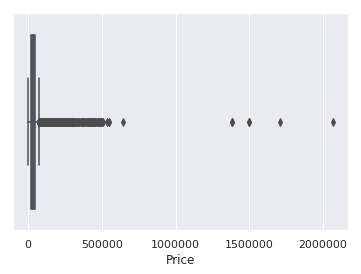

In [ ]:
sns.boxplot(x=df['Price'])

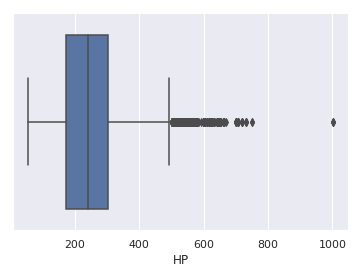

In [ ]:
sns.boxplot(x=df['HP'])

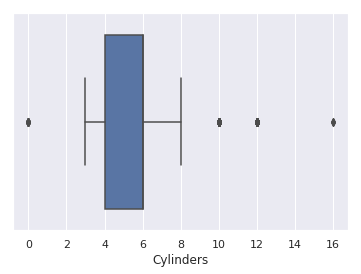

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

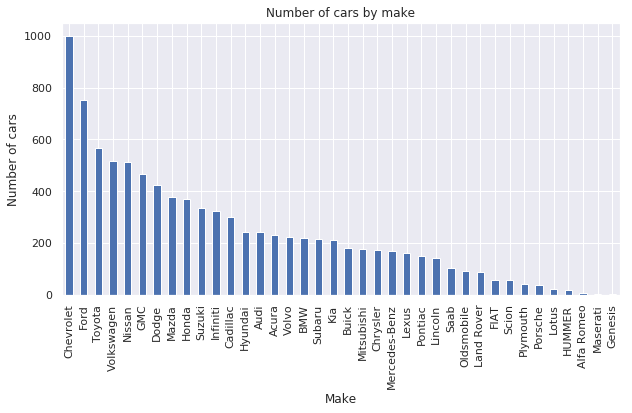

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


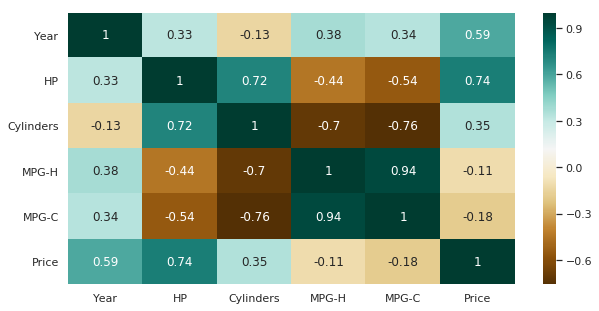

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

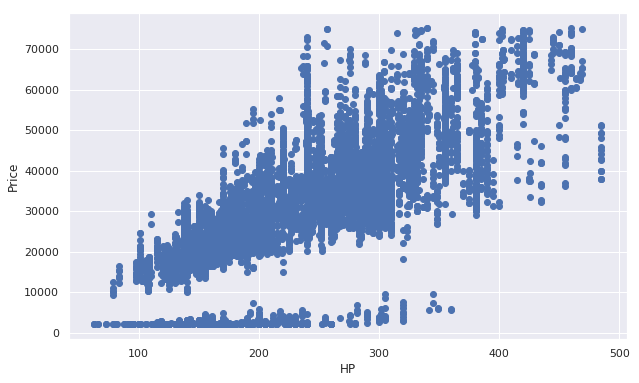

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.